ETL & EDA de 'Registros de viajes de Vehículos para alquiler'

Importamos las librerías necesarias

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo en una variable

In [3]:
df = pd.read_csv('CO2_taxis.csv', sep = ',', index_col= [0])

Visualizamos el DataSet

In [4]:
df.head()

,Year,Manufacturer,barrels08,co2,comb08,feScore,fuelCost08,fuelType,ghgScore,highway08,UCity,UHighway,youSaveSpend,createdOn,modifiedOn
0,2017,BMW,17.500588,519.0,17.0,3.0,3850.0,Premium,3.0,22.0,17.9989,30.0000,-9750.0,04-04-2016,09-09-2016
1,2017,BMW,12.396250,374.0,24.0,5.0,2700.0,Premium,5.0,28.0,26.7866,39.2499,-4000.0,04-04-2016,22-11-2016
2,2016,Infiniti,13.523182,402.0,22.0,5.0,2950.0,Premium,5.0,26.0,25.1000,37.3000,-5250.0,04-04-2016,26-09-2016
3,2017,MINI,11.018889,327.0,27.0,6.0,2400.0,Premium,6.0,32.0,30.8534,46.2000,-2500.0,12-04-2016,16-09-2016
4,2017,Kia,14.167143,433.0,21.0,4.0,2550.0,Regular,4.0,25.0,22.8000,34.7000,-3250.0,12-04-2016,02-12-2016


Diccionario de Datos del DataSet <br>

``Year``: año de fabricación<br>
``Manufacturer``: nombre del fabricante o la marca del vehículo. <br>
``co2``: emisiones de dióxido de carbono<br>
``m_x_g``: consumo de combustible en millas por galón<br>
``ef_x_comb``: puntuación de eficiencia de combustible del vehículo<br>
``comb_x_year``: gasto estimado de combustible por año<br>
``fuelType``:  tipo de combustible utilizado por el vehículo<br>
``score_ghg``:  Representa la puntuación de emisiones de gases de efecto invernadero del vehículo. Cuanto mayor sea la puntuación, menor será el impacto ambiental en términos de emisiones de gases de efecto invernadero.<br>
``ef_x_comb_city``: Representan la eficiencia de combustible en condiciones de conducción en la ciudad.<br>
``youSaveSpend``: Indica cuánto se puede ahorrar o gastar en combustible en comparación con un vehículo promedio.<br>
``createdOn``: Indican la fecha de creación de los registros en el conjunto de datos.<br>
``modifiedOn``: Indican la fecha de modificación de los registros en el conjunto de datos.<br>


Procedemos a eliminar las columnas que no nos servirán para nuestro análisis

In [5]:
df.drop(columns=['barrels08', 'highway08', 'UHighway'], inplace=True)

Renombramos las columnas para una lectura más amena

In [6]:
df.rename(columns={'comb08': 'm_x_g','feScore': 'ef_x_comb', 'fuelCost08':'comb_x_year','ghgScore':'score_ghg',
                      'UCity': 'ef_x_comb_city'}, inplace=True)

Verificar valores nulos

In [7]:
df.isnull().sum()


Year                 0
Manufacturer         0
co2                 17
m_x_g               17
ef_x_comb         1233
comb_x_year       1233
fuelType          1233
score_ghg         1233
ef_x_comb_city    1994
youSaveSpend      1994
createdOn         2016
modifiedOn        2016
dtype: int64

Encontramos que a pesar de tener datos faltantes, no son determinantes de nuestro analisis asi que simplemente los conservamos, ya que en otras columnas debemos mantener los datos que si estan en el mismo

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46186 entries, 0 to 46185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            46186 non-null  int64  
 1   Manufacturer    46186 non-null  object 
 2   co2             46169 non-null  float64
 3   m_x_g           46169 non-null  float64
 4   ef_x_comb       44953 non-null  float64
 5   comb_x_year     44953 non-null  float64
 6   fuelType        44953 non-null  object 
 7   score_ghg       44953 non-null  float64
 8   ef_x_comb_city  44192 non-null  float64
 9   youSaveSpend    44192 non-null  float64
 10  createdOn       44170 non-null  object 
 11  modifiedOn      44170 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 4.6+ MB


Verificamos valores duplicados

In [12]:
df.drop_duplicates(inplace = True)

Calcular el promedio de CO2

In [13]:
co2_promedio = round(df[df['co2'] != -1]['co2'].mean(),2)
co2_promedio

388.37

Entendemos que los valores `-1` representan valores no medidos, o no confiables. Nuestro criterio es reemplazar dichos valores por el valor promedio.

In [15]:
df['co2'] = df['co2'].replace(-1, co2_promedio)

Verificamos outliers

In [41]:
columnas = ['co2', 'm_x_g', 'ef_x_comb', 'comb_x_year', 'score_ghg', 'ef_x_comb_city', 'youSaveSpend']

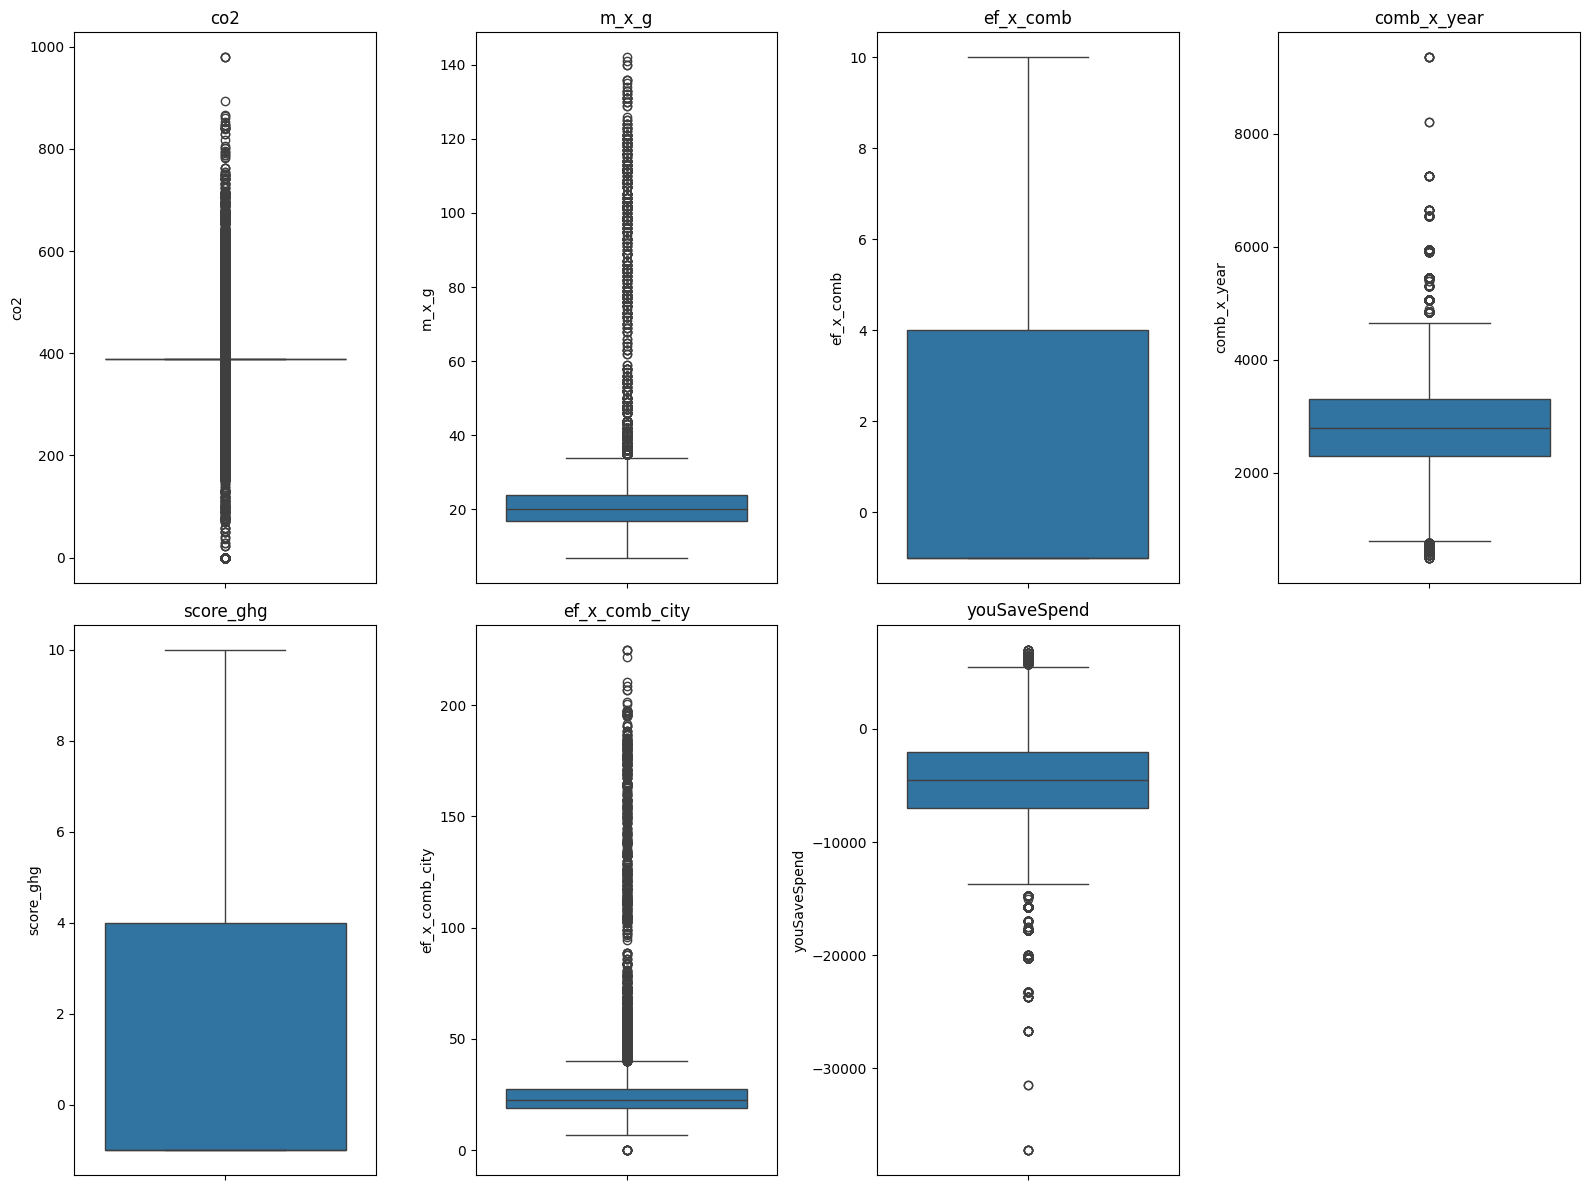

In [45]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(y = df[column])
    plt.title(column)

plt.tight_layout()

plt.show()


Vemos con mayor detalle los valores atípicos

In [46]:
df[df['co2'] > 800]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
1105,2020,Bugatti,840.0,11.0,1.0,5950.0,Premium,1.0,10.4000,-20250.0,05-11-2019,14-04-2020
1582,2022,Bugatti,979.0,9.0,1.0,7250.0,Premium,1.0,9.3000,-26750.0,24-09-2021,10-05-2022
1897,2023,Bugatti,840.0,11.0,1.0,5950.0,Premium,1.0,10.4000,-20250.0,13-10-2022,13-10-2022
2980,2013,Bugatti,847.0,10.0,1.0,6550.0,Premium,1.0,10.0000,-23250.0,01-01-2013,05-04-2017
3490,2015,Bugatti,847.0,10.0,1.0,6550.0,Premium,1.0,10.0000,-23250.0,30-05-2014,05-04-2017
9529,2018,Bugatti,840.0,11.0,1.0,5950.0,Premium,1.0,10.4000,-20250.0,13-07-2017,19-07-2017
10557,2021,Lamborghini,839.0,10.0,1.0,6550.0,Premium,1.0,10.2529,-23250.0,11-11-2020,03-08-2021
11113,2023,Bugatti,979.0,9.0,1.0,7250.0,Premium,1.0,9.3000,-26750.0,20-09-2022,20-09-2022
20946,2018,Mercedes-Benz,829.0,11.0,1.0,5950.0,Premium,1.0,12.9000,-20250.0,20-12-2017,03-12-2018
21511,2020,Bugatti,864.0,10.0,1.0,6550.0,Premium,1.0,10.4000,-23250.0,05-05-2020,12-05-2020


Vemos que los valores altos de emisión de CO2 pertenecen a autos de alta gama, por lo que entendemos que estos valores son esperados. <br>
Ahora procedemos a ver los outliers diametralmente opuestos

In [48]:
(df[df['co2'] < 100]).head(30)

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
20,2016,Tesla,0.0,98.0,10.0,700.0,Electricity,10.0,132.1000,6000.0,04-05-2016,26-09-2016
187,2017,Kia,0.0,105.0,10.0,650.0,Electricity,10.0,170.9000,6250.0,13-09-2016,05-07-2017
232,2017,Kia,97.0,40.0,10.0,1350.0,Regular Gas and Electricity,10.0,54.2000,4750.0,07-11-2016,25-03-2022
239,2017,Hyundai,0.0,136.0,10.0,500.0,Electricity,10.0,224.8000,7000.0,16-11-2016,28-11-2017
261,2017,Ford,0.0,107.0,10.0,650.0,Electricity,10.0,169.2000,6250.0,16-12-2016,05-07-2017
268,2017,Tesla,0.0,104.0,10.0,650.0,Electricity,10.0,137.5000,6250.0,11-01-2017,02-02-2022
269,2017,Tesla,0.0,103.0,10.0,700.0,Electricity,10.0,137.9000,6000.0,11-01-2017,02-02-2022
270,2017,Tesla,0.0,98.0,10.0,750.0,Electricity,10.0,125.3000,5750.0,11-01-2017,02-02-2022
295,2017,Tesla,0.0,102.0,10.0,700.0,Electricity,10.0,133.9000,6000.0,11-04-2017,02-02-2022
423,2018,Chevrolet,51.0,42.0,10.0,1250.0,Regular Gas or Electricity,10.0,58.7000,5500.0,03-08-2017,25-03-2022


Vemos que casi la totalidad de los autos de baja emisión de CO2 corresponden a automóviles eléctricos, con lo cual se corresponde con lo esperado.

Ahora visualizaremos los outliers del consumo de combustible en millas por galón __m_x_g__

In [49]:
df[df['m_x_g'] > 135]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
239,2017,Hyundai,0.0,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,16-11-2016,28-11-2017
684,2019,Hyundai,0.0,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,12-07-2018,02-02-2022
1433,2021,Tesla,0.0,142.0,10.0,500.0,Electricity,10.0,201.2,7000.0,24-03-2021,06-04-2021
11217,2023,Lucid,0.0,140.0,10.0,500.0,Electricity,10.0,187.4,7000.0,12-12-2022,17-02-2023
28128,2018,Hyundai,0.0,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,23-10-2017,02-02-2022
38009,2020,Tesla,0.0,141.0,10.0,500.0,Electricity,10.0,210.4,7000.0,05-11-2019,02-02-2022
44948,2023,Hyundai,0.0,140.0,10.0,500.0,Electricity,10.0,208.6,7000.0,17-05-2023,17-05-2023


Visualización de outliers respecto a la eficiencia de combustible en condiciones de conducción en la ciudad (__ef_x_comb_city__).

In [50]:
df[df['ef_x_comb_city'] > 135]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
187,2017,Kia,0.0,105.0,10.0,650.0,Electricity,10.0,170.9,6250.0,13-09-2016,05-07-2017
239,2017,Hyundai,0.0,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,16-11-2016,28-11-2017
261,2017,Ford,0.0,107.0,10.0,650.0,Electricity,10.0,169.2,6250.0,16-12-2016,05-07-2017
268,2017,Tesla,0.0,104.0,10.0,650.0,Electricity,10.0,137.5,6250.0,11-01-2017,02-02-2022
269,2017,Tesla,0.0,103.0,10.0,700.0,Electricity,10.0,137.9,6000.0,11-01-2017,02-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
44919,2023,Ford,0.0,98.0,10.0,700.0,Electricity,10.0,149.3,6000.0,16-03-2023,16-03-2023
44946,2023,Cadillac,0.0,89.0,10.0,800.0,Electricity,10.0,137.2,5500.0,17-05-2023,17-05-2023
44947,2023,Hyundai,0.0,121.0,10.0,600.0,Electricity,10.0,190.5,6500.0,17-05-2023,17-05-2023
44948,2023,Hyundai,0.0,140.0,10.0,500.0,Electricity,10.0,208.6,7000.0,17-05-2023,17-05-2023


### Observamos los datos de los outliers mas significativos. Llegamos a la conclusion de que tanto en el consumo de combustible de millas por galon y en la eficiencia de combustible en la ciudad los autos electricos tienen altos valores debido a que son mas eficientes que los de combustion interna.

#### También podemos observar que los autos de alta gama gastan mas combustible en comparacion con un vehículo promedio.

Creamos una matriz de correlación para visualizar en mayor profundidad nuestras variables numéricas y sus relaciones.

<Axes: >

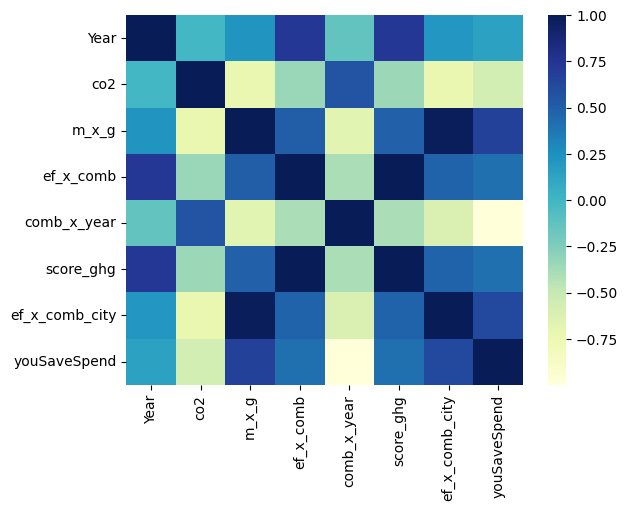

In [51]:
taxis_numeric = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = taxis_numeric.corr()

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")

### Conclusiones

 - El co2 tiene una buena relacion con respecto al año de creacion del auto, a medida que pasan los años bajan las emisiones de dioxido de carbono por lo que los vehículos mas nuevos emiten mayor contaminación, siempre y cuando los veichulos sean standar.<br><br>
 - Los autos electricos no emiten Co2.<br><br>
 - score_ghg almacena la puntuación de emisiones de gases de efecto invernadero (GHG) de un vehículo, que está relacionada con sus emisiones de gases perjudiciales para el medio ambiente. De igual manera, el score sube a medida que subio la cantidad de co2 producido <br><br>
 - El m_x_g Representa el consumo de combustible en millas. Claramente relacionado en el grafico con la eficiencia del vehiculo en consumo de combustible <br><br>
 - El ahorro de o gasto de combustible (youSaveSpend) esta altamente relacionado con la eficiencia de combustible

## Historiama de frecuencias

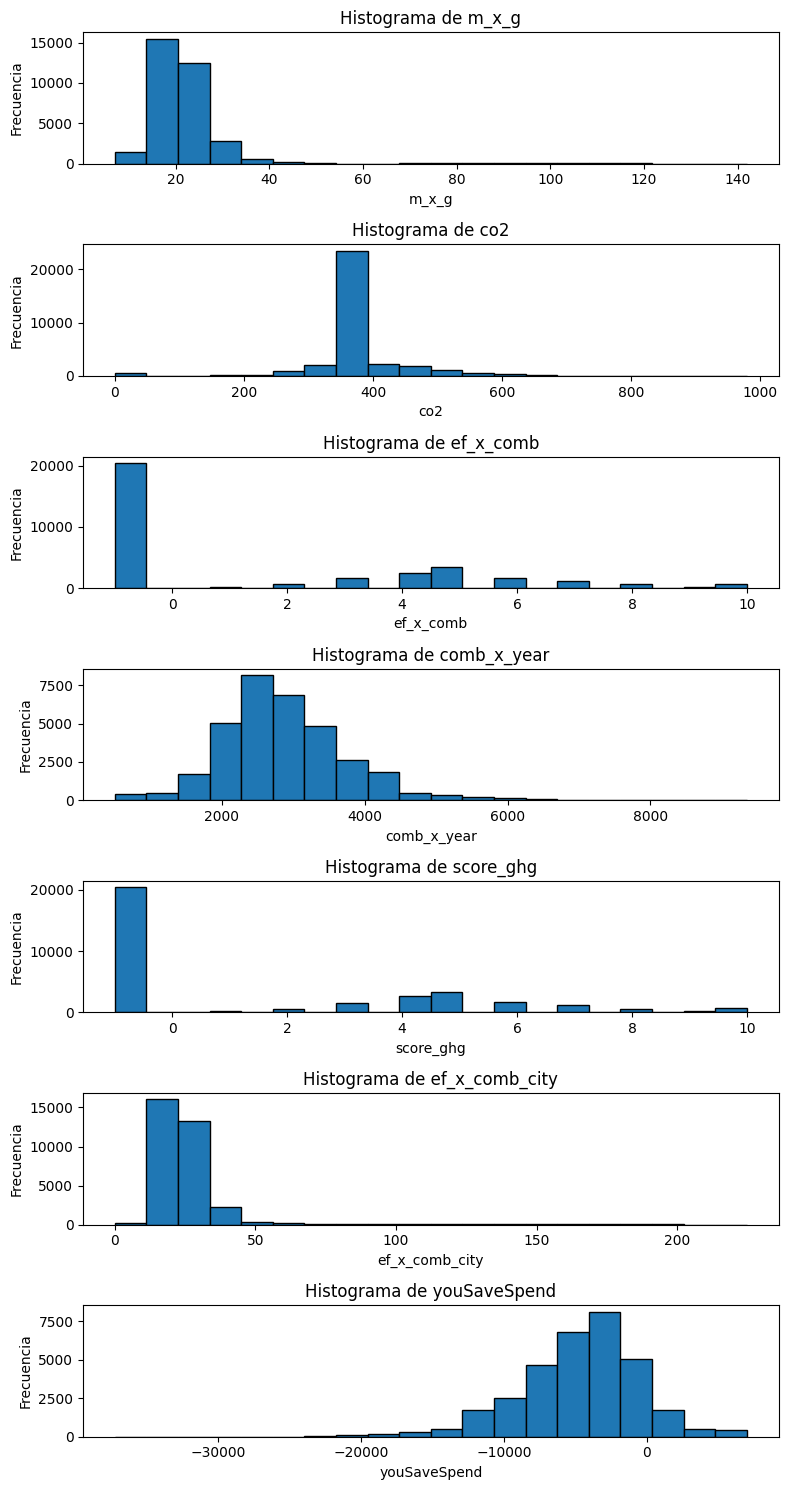

In [57]:
variables = ["m_x_g", "co2", "ef_x_comb", "comb_x_year", "score_ghg", "ef_x_comb_city", "youSaveSpend"]

# Configura la figura con subtramas
fig, axes = plt.subplots(nrows=len(variables), figsize=(8, 15))

# Crea histogramas para cada variable
for i, var in enumerate(variables):
    axes[i].hist(df[var], bins = 20, edgecolor = 'black')
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')


plt.tight_layout()

plt.show()